In [103]:
from IPython.display import display
display({'text/html': '<h1>Topic7 Assignment</h1>', 'text/plain': 'Topic7 Assignment'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>12/13/2021</h1>', 'text/plain': '12/13/2021'}, raw=True)


Topic7 Assignment

Anoop Korappath

12/13/2021

## Clustering is the task of dividing the population or data points into several groups, such that data points in a group are homogenous to each other than those in different groups. There are numerous clustering algorithms, some of them are – “K-means clustering algorithms”, “mean shift”, “hierarchal clustering”, etc.
## K-means
K-means clustering analyse and find patterns/clusters within data.<br>
Uses Distance measures.

#### I will use the scikit-learn library
##### *) Clusters data by trying to separate samples in n groups of equal variance
##### *) Minimizing a criterion known as the inertia or within-cluster sum-of-squares
##### *) Requires the number of clusters to be specified
##### *) It scales well

#### Algorithm
##### *) Divides a set of samples into disjoint clusters
##### *) Each described by the mean of the samples in the cluster
##### *) The means are commonly called the cluster "centroids"
##### *) Note that the centroids are not , in general, points from, although they live in the same space
##### *) The K-means algorithm aims to choose centroids that minimise the inertia,or within-cluster sum of squared criterion.

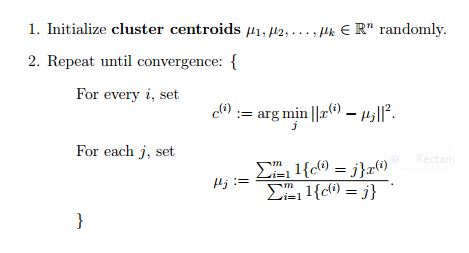

In [104]:
from IPython.display import Image
Image(filename='C:\\Users\\Anoops\\Downloads\\1.jpg')

## Data set - Iris
The data set contains 3 classes with 50 instances each, and 150 instances in total, where each class refers to a type of iris plant.
Class : Iris Setosa,Iris Versicolour, Iris Virginica<br>
The format for the data: (sepal length, sepal width, petal length, petal width)<br>
We will be training our models based on these parameters and further use them to predict the flower classes.

## K-means Code with k = 3 and iris data set

   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   Target
0       0
1       0
2       0
3       0
4       0


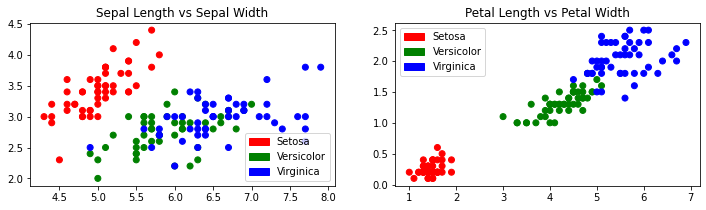

In [105]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

iris = datasets.load_iris()


x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

print(x.head())
print(y.head())

plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [106]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [107]:
print(iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [108]:
print(iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


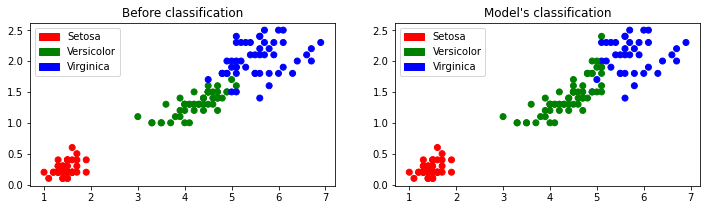

In [109]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [110]:
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

#### Correctly identifed all 0 classes as 0’s correctly classified 48 class 1’s but miss-classified 2 class 1’s as class 2 correctly classified 36 class 2’s but miss-classified 14 class 2’s as class 1

## How to choose optimal number of clusters
### Elbow method
*) Use intrinsic metrics
*) An example if this is the within-cluster Sums of Squared Error

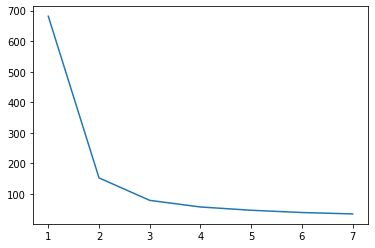

In [111]:
sse_= []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k).fit(x)
    sse_.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

#### We can see that k can be 3 as per the elbow method.

### Silhoutte Analysis

### silhouette score = p - q / max(p,q)
#### p is the mean distance to the points in the nearest cluster that the data point is not a part of
#### q is the mean intra-cluster distance to all the points in its own cluster
##### The value of the silhouette score range lies between -1 to 1
##### A score closer to 1 indicates that the data point is very similar to other data points in the cluster
##### A score closer to -1 indicates that the data point is very similar to other data points in the cluster

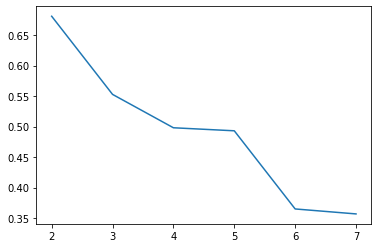

In [112]:
from sklearn.metrics import silhouette_score

sse_= []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k).fit(x)
    sse_.append([k,silhouette_score(x,kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

#### We can see that k can be 3 or 4 as per the Silhoutte Analysis.

### Some challenges with K-means
##### *) The global optimal result may not be acheived
##### *) The number of clusters must be selected beforehand
##### *) K-means is limited to linear cluster boundaries
##### *) K-means can be slow for large number of clusters
